# Exercise 1 : Use the openpyxl module to create a new workbook and add values/formulae to it

In [1]:
from openpyxl import Workbook

# Create a new workbook
workbook = Workbook()

# Get the active worksheet
worksheet = workbook.active

# Add values to cells
worksheet["A1"] = "First number ==>"
worksheet["B1"] = 2
worksheet["A2"] = "Second number ==>"
worksheet["B2"] = 8

# Add a formula to a cell
worksheet["B3"] = "=B1*B2"

# Save the workbook
workbook.save("example_workbook.xlsx")

# Close the workbook
workbook.close()


# Exercise 2 : Open an Excel workbook and read down a list of plants finding the ones not in stock

The file is not accesible

# Exercise 3 : Load Excel File and Write the Data

From this file, do the following tasks :

1. Load Excel File and give path to your file
2. Perform data manipulation on the DataFrame by filtering the data where ‘Sales’ is greater than 1000.
3. Use Openpyxl to write the filtered data back to the Excel file

In [5]:
import pandas as pd

# Step 1: Specify file paths
input_file = "data.xlsx"  # Replace with the actual path to your source file
output_file = "output.xlsx"  # Replace with the desired name/path for your output file

# Step 2: Read data from the input Excel file
try:
    data = pd.read_excel(input_file)
    print(f"Data successfully read from {input_file}")
except FileNotFoundError:
    print(f"Error: The file {input_file} was not found. Please check the path.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Step 3: Filter data where 'Sales' > 1000
try:
    filtered_data = data[data['Sales'] > 1000]  # Filtering condition
    if filtered_data.empty:
        print("No rows found where 'Sales' > 1000.")
    else:
        print(f"Filtered data contains {len(filtered_data)} rows.")
except KeyError:
    print("Error: The 'Sales' column does not exist in the dataset.")
    exit()
except Exception as e:
    print(f"An error occurred while filtering the data: {e}")
    exit()

# Step 4: Save the filtered data to the output Excel file
try:
    filtered_data.to_excel(output_file, index=False)
    print(f"Filtered data has been saved successfully to {output_file}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")


Data successfully read from data.xlsx
Filtered data contains 1221 rows.
Filtered data has been saved successfully to output.xlsx


# Exercise 4 : Load Excel File, plot charts and Manipulate Data
1. import the necessary libraries pandas and matplotlib.pyplot, read data from an Excel file productSales.xlsx
2. Manipulate the data by grouping it by ‘product’ and summing the sales for each product using pandas’ group by () and sum() functions
3. Export it back into a new Excel file (‘sales_report.xlsx’) using pandas’ to_excel() function
4. Save and close the file using the save() and close() methods of the ExcelWriter object.

      product  sales
0       Apple     84
1      Banana    103
2  Strawberry    115
3  Watermelon     96


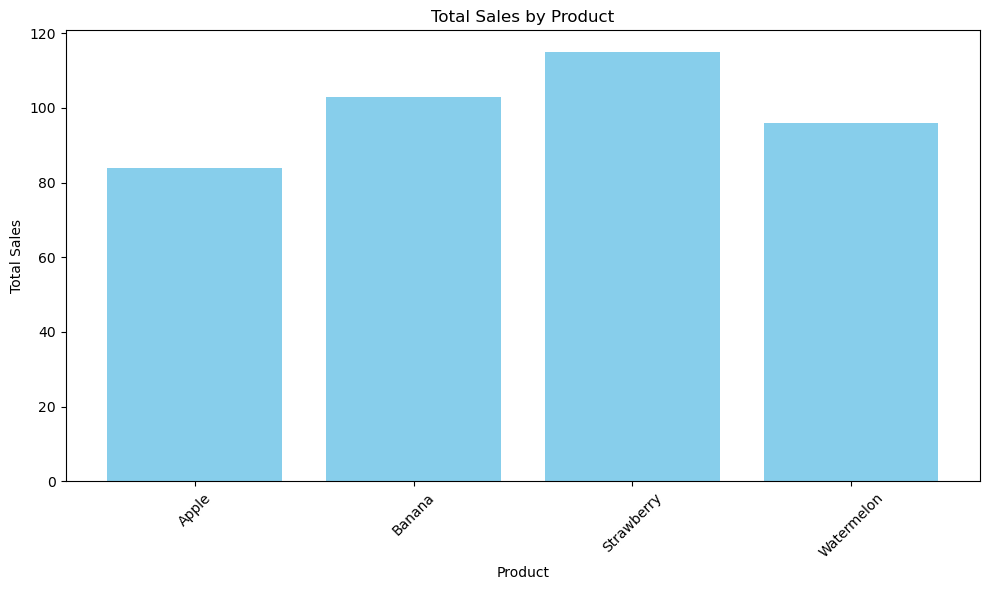

Sales chart has been plotted and saved as 'sales_chart.png'.
Sales report successfully saved to sales_report.xlsx


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from the Excel file
input_file = "productSales.xlsx"  # Replace with your actual file path
output_file = "sales_report.xlsx"  # File where results will be saved

data = pd.read_excel(input_file)


sales_report = data.groupby('product', as_index=False)['sales'].sum()

print(sales_report)


# Step 3: Plot the sales data

plt.figure(figsize=(10, 6))
plt.bar(sales_report['product'], sales_report['sales'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart as a PNG file
plt.show()
print("Sales chart has been plotted and saved as 'sales_chart.png'.")



with pd.ExcelWriter(output_file) as writer:
    sales_report.to_excel(writer, index=False, sheet_name="Sales Summary")

print(f"Sales report successfully saved to {output_file}")

